# Milestone 1

In [77]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Reading the Data

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
df = pd.read_csv("/content/drive/MyDrive/Sales Forecasting Project/Milestone_1/Copy of train.csv")
df.head(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [80]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# Checking for Na values

In [81]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

(9800, 18)

# Handling Na values

In [82]:
df.dropna(inplace = True , axis = 0)

In [83]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float64(2)

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


# Checking for duplicated values

In [84]:
df.duplicated().sum()

0

# converting Date from object to Datetime

In [85]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y")
df["Delivery time"] =  (df["Ship Date"] - df["Order Date"]).dt.days

# time based features

In [86]:
df['shipping year'] = df['Ship Date'].dt.year
df['shipping month'] = df['Ship Date'].dt.month
df['shipping day'] = df['Ship Date'].dt.day

# Discovarable insights

In [87]:
ship_modes = df.groupby("Ship Mode")["Ship Mode"].count()
segment = df.groupby("Segment")["Segment"].count()
city = df.groupby("City")["City"].count()
state = df.groupby("State")["State"].count()
region = df.groupby("Region")["Region"].count()
category =  df.groupby("Category")["Category"].count()
sub_cat = df.groupby("Category")["Category"].count()
years = df.groupby("shipping year")["shipping year"].count()

# Feature selection

correlation matrices

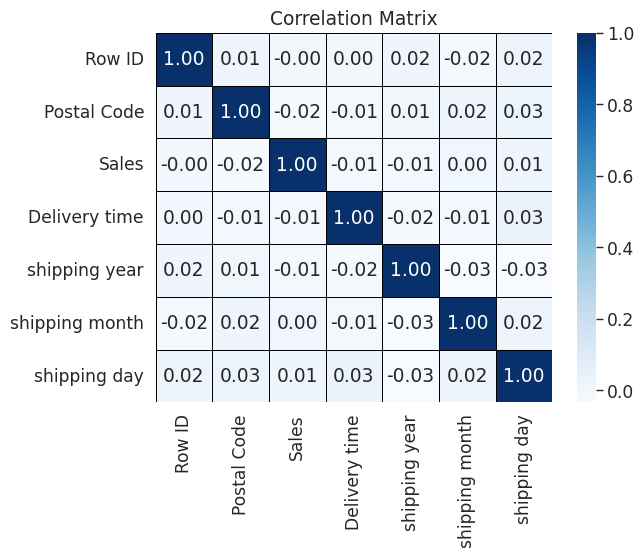

In [88]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5 , linecolor="black")
plt.title("Correlation Matrix")
plt.show()


<ipython-input-89-68c011015ae3>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




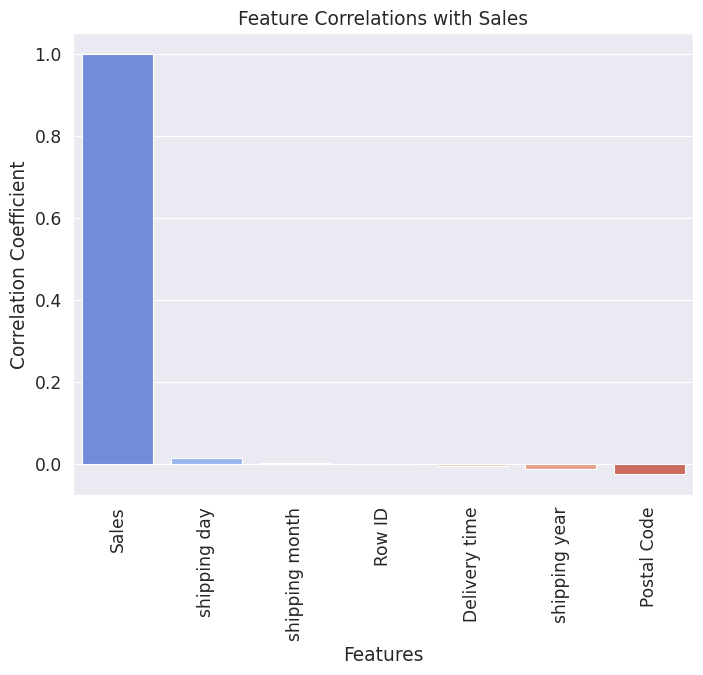

In [89]:
target_corr = df.corr(numeric_only=True)['Sales'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Feature Correlations with Sales")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()


In [90]:
columns_to_drop = [
    "Row ID",
    "Order ID",
    "Customer ID",
    "Customer Name",
    "Product ID",
    "Product Name"
]
df.drop(columns=columns_to_drop , inplace = True)

# Checking outliers and handle them

In [91]:
fig = px.box(df , y = "Sales")
fig.show()

interqurtile range outliers_detection function

In [92]:
def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    list = []
    for item in data:
        if item < lower or item > upper:
            list.append(item)
    return len(list)

In [93]:
sales_outliers = detect_outliers(df["Sales"])
outliers_percentage = (sales_outliers / len(df["Sales"]) )* 100
print(f'{outliers_percentage}%')

11.655940341199306%


In [94]:
sales_outliers = detect_outliers(df["Sales"])
outliers_percentage = (sales_outliers / len(df["Sales"]) )* 100
print(f'{outliers_percentage}%')

11.655940341199306%


In [95]:
fig = px.box(df , y = "Sales")
fig.show()

<Axes: xlabel='Sales', ylabel='Count'>

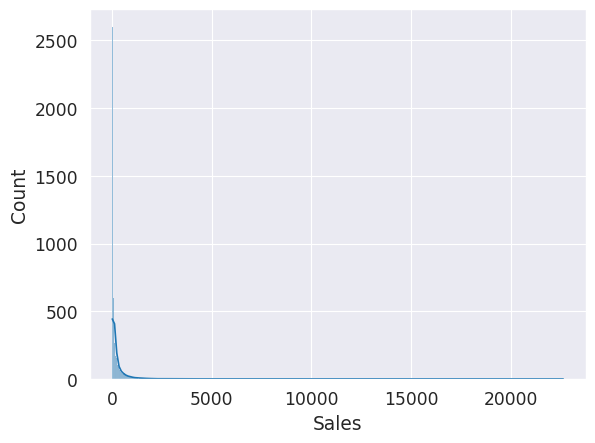

In [96]:
sns.histplot(df["Sales"] , kde = True)

# Visualization

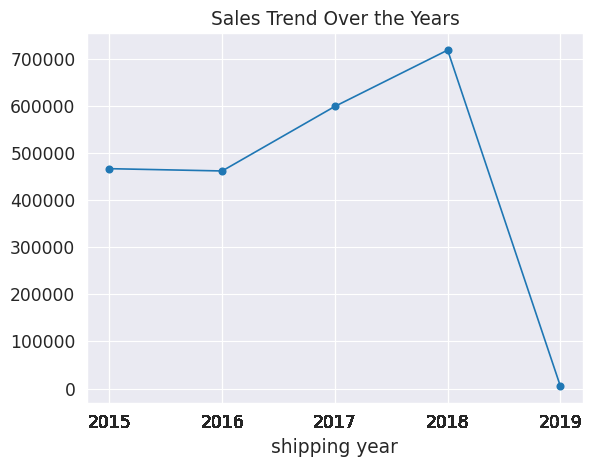

In [97]:
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.4)
df.groupby('shipping year')['Sales'].sum().plot(kind='line', marker='o')
plt.xticks(df["shipping year"])
plt.title('Sales Trend Over the Years')
plt.show()

<ipython-input-98-ee5219f8a3f4>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Total Sales across Years'}, xlabel='shipping year', ylabel='Sales'>

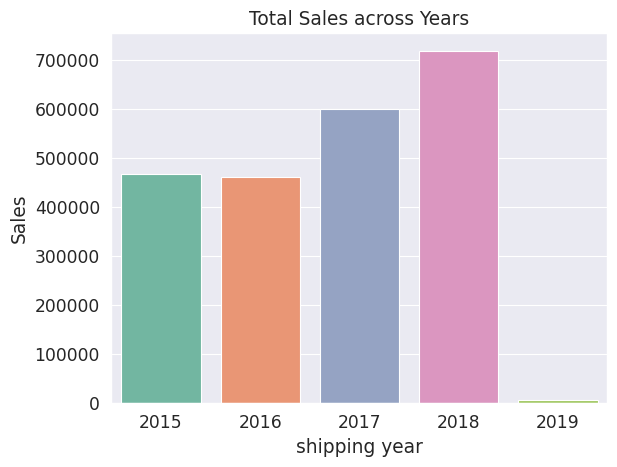

In [98]:
plt.title("Total Sales across Years")
sns.barplot(x = df["shipping year"] , y = df["Sales"] , errorbar=None , palette="Set2" , estimator=sum)

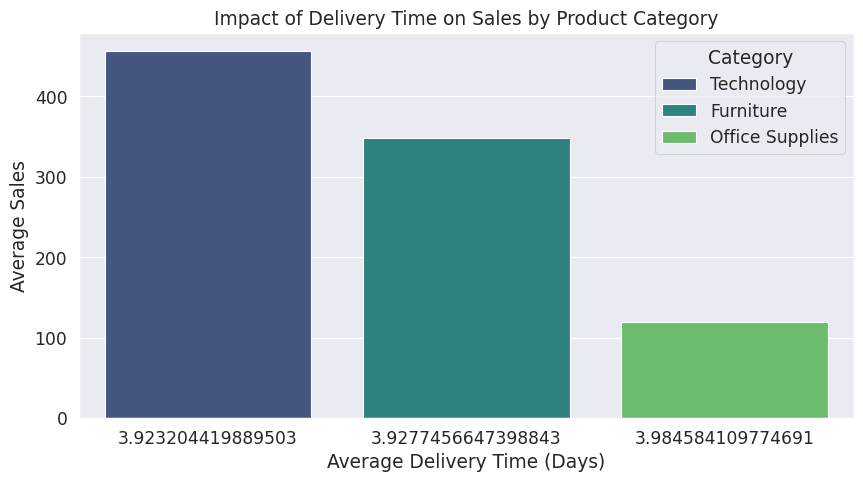

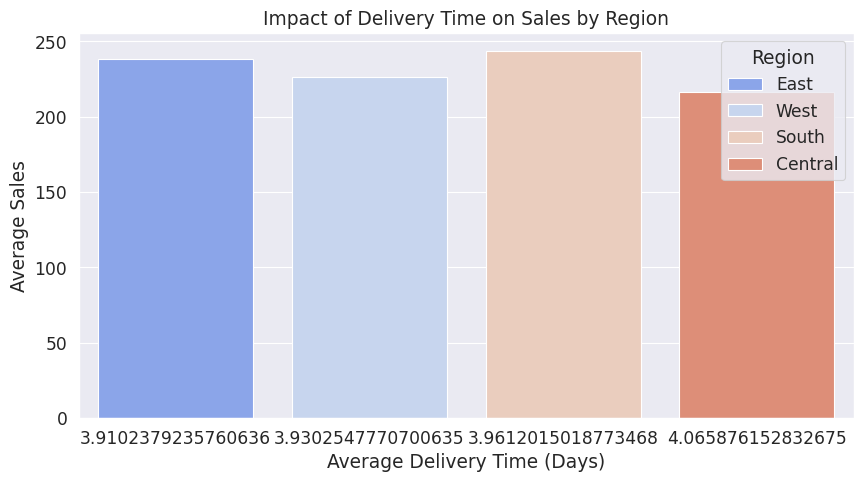

In [99]:
category_analysis = df.groupby("Category")[["Delivery time", "Sales"]].mean().reset_index()
region_analysis = df.groupby("Region")[["Delivery time", "Sales"]].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x="Delivery time", y="Sales", hue="Category", data=category_analysis, palette="viridis")
plt.xlabel("Average Delivery Time (Days)")
plt.ylabel("Average Sales")
plt.title("Impact of Delivery Time on Sales by Product Category")
plt.legend(title="Category")
plt.show()
plt.figure(figsize=(10, 5))
sns.barplot(x="Delivery time", y="Sales", hue="Region", data=region_analysis, palette="coolwarm")
plt.xlabel("Average Delivery Time (Days)")
plt.ylabel("Average Sales")
plt.title("Impact of Delivery Time on Sales by Region")
plt.legend(title="Region")
plt.show()

In [100]:
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month
monthly_trends = df.groupby("Month")[['Delivery time', 'Sales']].mean().reset_index()
yearly_trends = df.groupby("Year")[['Delivery time', 'Sales']].mean().reset_index()
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=monthly_trends['Month'], y=monthly_trends['Sales'],mode='lines+markers', name='Average Sales',line=dict(color='blue')))
fig1.add_trace(go.Scatter(x=monthly_trends['Month'], y=monthly_trends['Delivery time'],mode='lines+markers', name='Average Delivery Time',line=dict(color='red'), yaxis='y2'))
fig1.update_layout(title='Seasonal Trend: Sales & Delivery Time by Month', xaxis_title='Month', yaxis=dict(title='Average Sales ($)', color='blue'),yaxis2=dict(title='Average Delivery Time (Days)', overlaying='y', side='right', color='red'))
fig1.show()
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=yearly_trends['Year'], y=yearly_trends['Sales'],mode='lines+markers', name='Average Sales',line=dict(color='blue')))
fig2.add_trace(go.Scatter(x=yearly_trends['Year'], y=yearly_trends['Delivery time'],mode='lines+markers', name='Average Delivery Time',line=dict(color='red'), yaxis='y2'))
fig2.update_layout(title='Yearly Trend: Sales & Delivery Time',xaxis_title='Year',yaxis=dict(title='Average Sales ($)', color='blue'),yaxis2=dict(title='Average Delivery Time (Days)', overlaying='y', side='right', color='red'))
fig2.show()

In [101]:
monthly_trends = df.groupby("Month")[["Delivery time", "Sales"]].mean().reset_index()
monthly_trends

,Month,Delivery time,Sales
0,1,4.208914,256.217659
1,2,4.050505,199.902745
2,3,3.682353,290.549393
3,4,4.157012,205.774772
4,5,3.842759,212.533412
5,6,3.931983,211.052856
6,7,3.922525,208.802997
7,8,4.105339,227.007110
8,9,3.974151,221.642106
9,10,3.841780,246.596162


In [102]:
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.4)

In [103]:
px.pie(df , values = "Sales" , names = "Region" , title = "Sales percentage by Region")

In [104]:
fig = px.box(df , x = "Region" , y = "Sales")
fig.show()

<ipython-input-105-85b4df5e0503>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'most used shiping mode'}, xlabel='Ship Mode', ylabel='count'>

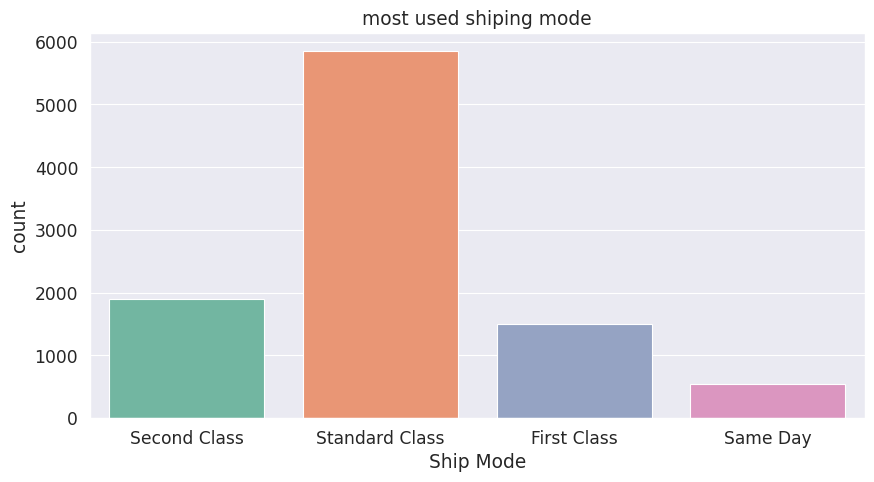

In [105]:
plt.figure(figsize = (10,5))
plt.title("most used shiping mode")
sns.countplot(x = df["Ship Mode"] , palette="Set2")


<Axes: title={'center': 'most used shiping modes among segments'}, xlabel='Ship Mode', ylabel='count'>

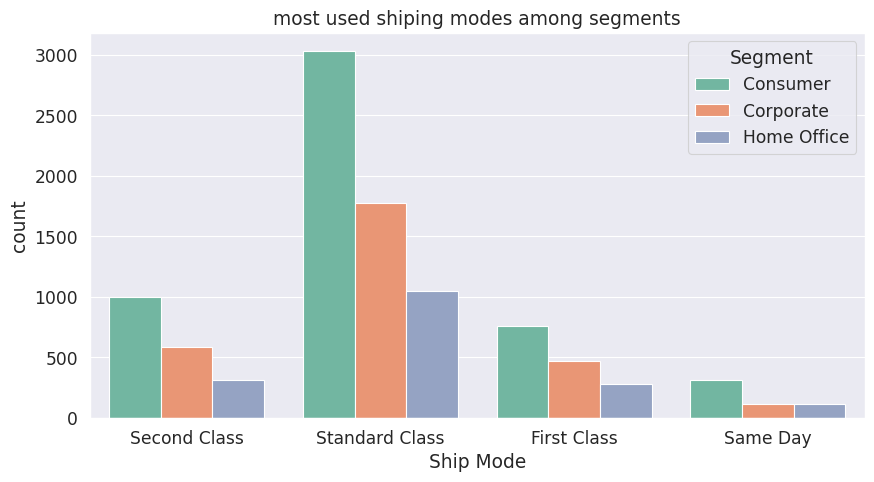

In [106]:
plt.figure(figsize = (10,5))
plt.title("most used shiping modes among segments")
sns.countplot(x = df["Ship Mode"] , palette="Set2" , hue = df["Segment"])


<Axes: title={'center': 'most used shiping modes among reigons'}, xlabel='Region', ylabel='count'>

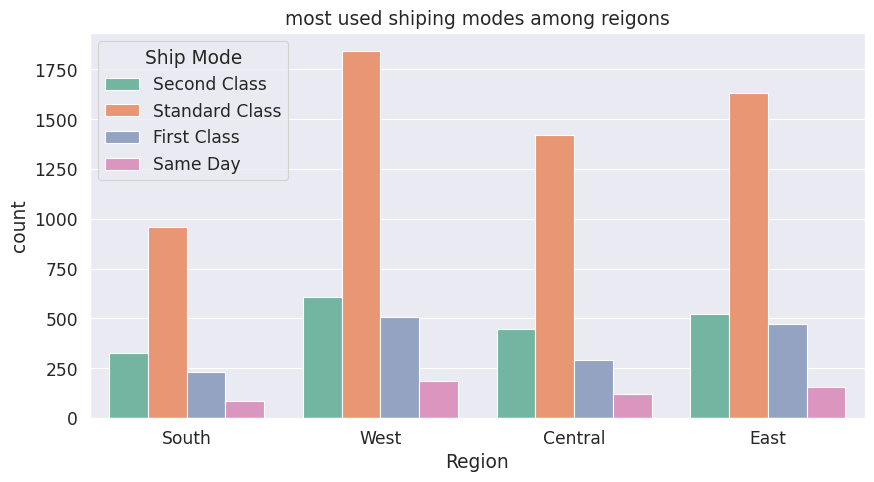

In [107]:
plt.figure(figsize = (10,5))
plt.title("most used shiping modes among reigons")
sns.countplot(x = df["Region"] , palette="Set2" , hue = df["Ship Mode"])

<ipython-input-108-e0fa46e47eb6>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-108-e0fa46e47eb6>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Categories Total sales'}, xlabel='Category', ylabel='Sales'>

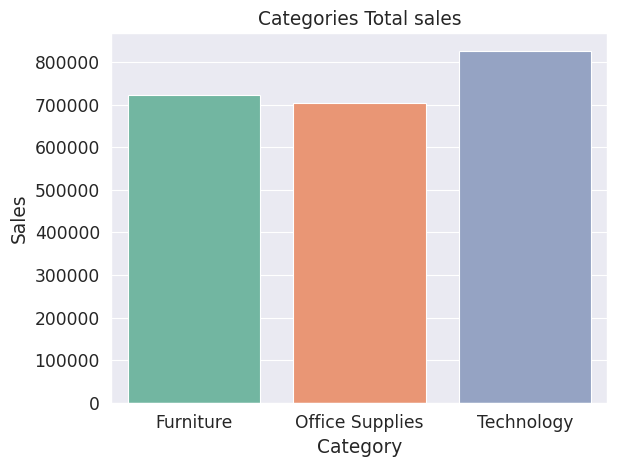

In [108]:
plt.title("Categories Total sales")
sns.barplot(x = df["Category"] , y = df["Sales"] , estimator=sum , palette="Set2" , ci = None)

<ipython-input-109-ff0c811ecd85>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-109-ff0c811ecd85>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Total Sales across Regions '}, xlabel='Region', ylabel='Sales'>

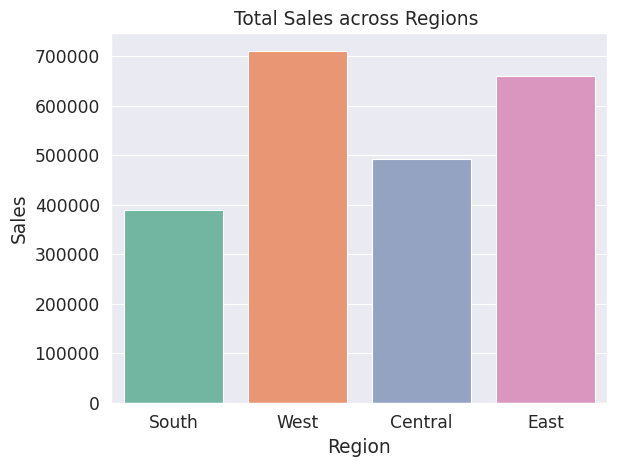

In [109]:
plt.title("Total Sales across Regions ")
sns.barplot(x = df["Region"] , y = df["Sales"] , ci  = None , palette="Set2" , estimator=sum)

<ipython-input-110-4793b250b03a>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-110-4793b250b03a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Total Sales acorrding to segments'}, xlabel='Segment', ylabel='Sales'>

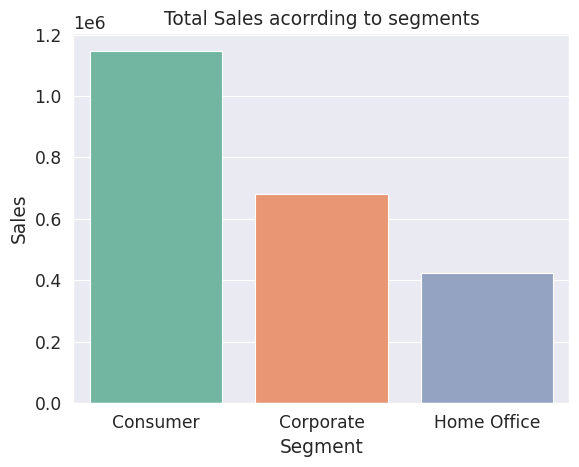

In [110]:
plt.title("Total Sales acorrding to segments")
sns.barplot(x = df["Segment"] , y = df["Sales"] , ci  = None , palette="Set2" , estimator=sum)

<Axes: xlabel='Region', ylabel='Sales'>

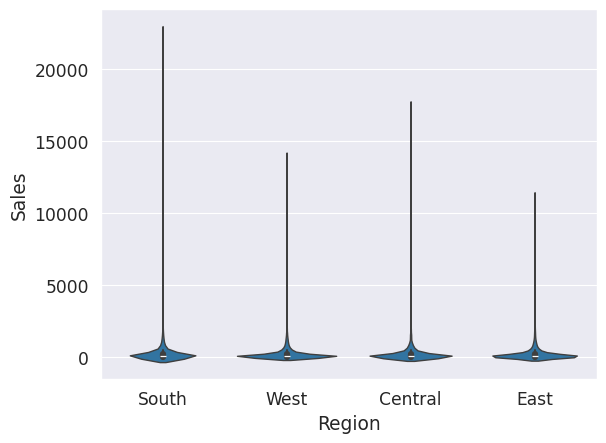

In [111]:
sns.violinplot(x = df["Region"] , y = df["Sales"])

<Axes: xlabel='Region', ylabel='Sales'>

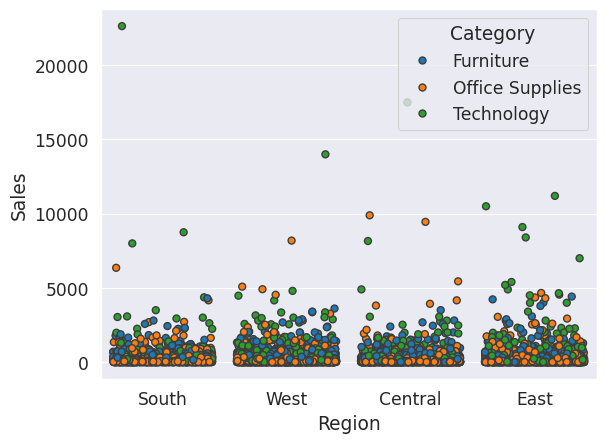

In [112]:
sns.stripplot(y = df["Sales"] , x = df["Region"] , linewidth = 1 , hue = df["Category"] , jitter=0.4)

<Axes: xlabel='Sales', ylabel='Count'>

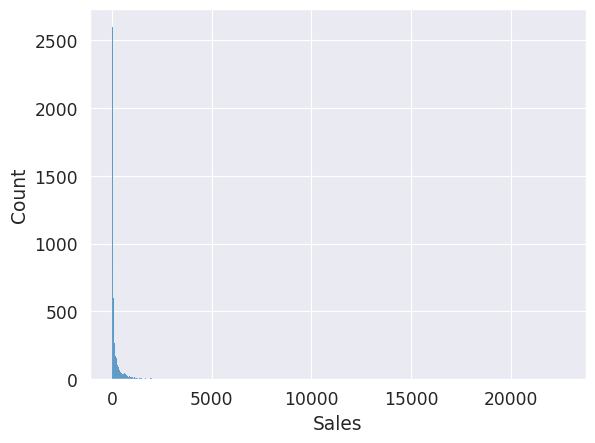

In [113]:
sns.histplot(x = df["Sales"])

<Axes: xlabel='Sales'>

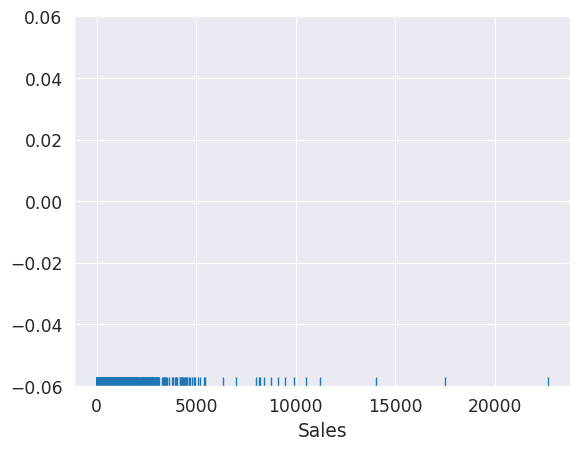

In [114]:
sns.rugplot(df["Sales"])

# Feature scalling & Encoding

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler = MinMaxScaler()
df['Sales'] = scaler.fit_transform(df[["Sales"]])


# Saving the cleaned and processed data set in csv file

In [117]:
df.to_csv("cleaned_data.csv" , index = False)